In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from src.data.dataset import GlossSeq2PolishDataset
import seaborn as sns
from matplotlib import pyplot as plt
from pprint import pprint
from src.settings import GLOSS_SPECIAL_SYMBOLS
from src.data.utils import iter_dto_as_dicts
import numpy as np
from IPython.display import display_markdown
from src.data.utils import get_task_name

In [3]:
dataset = GlossSeq2PolishDataset()

In [4]:
gloss_annotations = (dto for record in dataset for dto in record.gloss_sequence)
gloss_df = pd.DataFrame.from_records(iter_dto_as_dicts(gloss_annotations))
gloss_df

,start,end,text,doc_filepath,video_filename,task_label,dominant_hand
0,39040,39440,MYŚLEĆ 2.1 P:Z;L:Z (NA PRZEMIAN),/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
1,39440,39640,JAK 1.2 P:I;L:Ø,/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
2,39640,39920,POMYSŁ 1.3 P:AZ;L:Ø,/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
3,39920,40200,WSKAZ-JA 1.1 P:L;L;Ø (Z WIDOCZNYM KCIUKIEM),/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
4,40200,41120,MOŻNA 1.1 P:B;L:B (MOŻE/MOŻLIWE),/15/K66BF13-26_15_15_signsNO.eaf,K66BF13-26.mp4,15,True
...,...,...,...,...,...,...,...
242110,353480,354480,NIEDŹWIEDŹ/MIŚ 1.2 P:B;L:Ø,/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True
242111,354680,356440,PRZESTRASZYĆ 1.1 P:5A;L:5A (JAK ZŁAPAĆ),/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True
242112,359240,360120,BIUSTONOSZ 1.2. P:5;L:5 (STANIK/STRÓJ KĄPIELOWY),/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True
242113,360120,360960,DZIECKO 2.2 P:I1;LØ,/13/K17BF13-26_13_13_comics.eaf,K17BF13-26.mp4,13,True


In [17]:
gloss_seq_in_corresponding_polish = [len(record.gloss_sequence) for record in dataset]
display_markdown(
    f"### Mean number of gloss annotations for corresponding Polish annotation:<br>`{sum(gloss_seq_in_corresponding_polish) / len(gloss_seq_in_corresponding_polish):.4f}`",
    raw=True
)

### Mean number of gloss annotations for corresponding Polish annotation:<br>`6.1105`

In [6]:
gloss_ann_counts = gloss_df["text"].value_counts()
gloss_ann_counts

text
WSKAZ: Z WSZYSTKIE KIERUNKI                                             8672
%                                                                       5090
CHŁOPAK/MĘŻCZYZNA/PAN 1.1 P:Z;L:Ø                                       3739
WSKAZ: Z (WSZYSTKIE KIERUNKI/STRZELAĆ/JEŹDZIĆ/WŁAŚNIE/TO/W-TYM-ROKU)    3729
WSKAZ: L WSZYSTKIE KIERUNKI                                             3372
                                                                        ... 
TOR 3.2 P:Z;L:Z                                                            1
N.A.N.A.[P].[Ó].J.                                                         1
N.A.[P].[Ó].J.                                                             1
WEEKEND 6.2 P:W;L:Ø                                                        1
$:KL: H (PTAK NA ŚCIANIE/NA GÓRZE)? DL>MG                                  1
Name: count, Length: 7607, dtype: int64

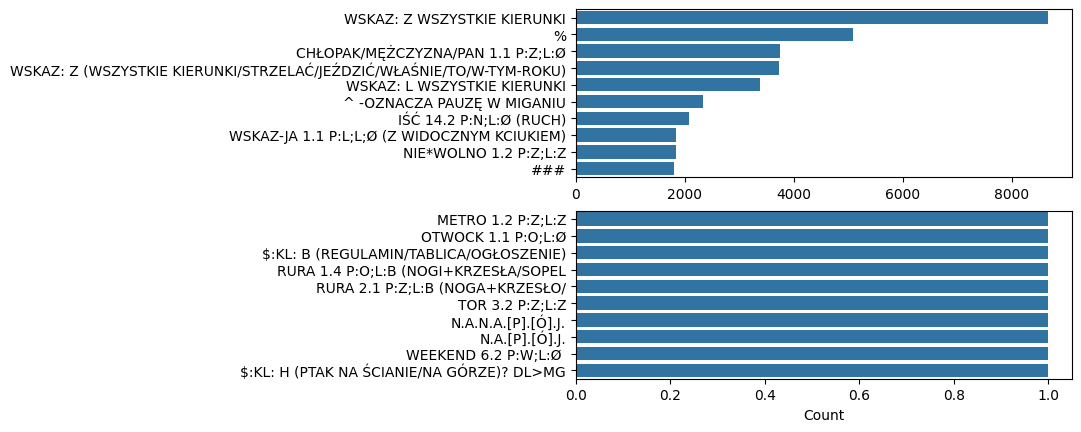

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1)
ax1, ax2 = axes.flatten()
sns.barplot(
    # least common 10 `gloss` annotations
    data=gloss_ann_counts[:10],
    orient="h",
    ax=ax1,
)
sns.barplot(
    # most common 10 `gloss` annotations
    data=gloss_ann_counts[-10:],
    orient="h",
    ax=ax2,
)
ax1.set(ylabel=None)
ax1.set(xlabel=None)
ax2.set(ylabel=None)
plt.xlabel("Count")
plt.show()

## Special symbols used in the annotation of the PJM Corpus

| Symbol | Meaning |
|  :-:   | :-      |
| `###` | interrupted, unfinished signs |
| `^` | hold-pause between signs |
| `%` | palm-ups |
| `&` | gestures meaning "never mind, whatever" |
| `@` | phatic gestures |

In [8]:
gloss_ann_counts[gloss_ann_counts.index.isin(GLOSS_SPECIAL_SYMBOLS)]

text
%      5090
###    1806
&      1477
@       895
Name: count, dtype: int64

In [9]:
# ###, ^, %, &, @
gloss_ann_counts[
    gloss_ann_counts.index.str.contains("###", regex=False)
    | gloss_ann_counts.index.str.contains("^", regex=False)
    | gloss_ann_counts.index.str.contains("%", regex=False)
    | gloss_ann_counts.index.str.contains("&", regex=False)
    | gloss_ann_counts.index.str.contains("@", regex=False)
]

text
%                                       5090
^ -OZNACZA PAUZĘ W MIGANIU              2328
###                                     1806
&                                       1477
@                                        895
AKURAT 1.5 P:O;L:B @                     675
MOŻNA & 1.4 P:B;L:Ø (MOŻE/MOŻLIWE)       116
G: B+B (DOBRA &)                         101
MOŻNA & 1.2 P:B;L:B  (MOŻE/MOŻLIWE)       93
NIE*MIEĆ (= %) 1.4 P:B;L:B                93
SKAKAĆ 1.7 P:H;L:B @                      12
SOWA 1.1 P:O;L:O @                        11
NIE*MIEĆ (= %) 1.3 P:B;L:Ø (WZÓR: %)      10
ALE 1.6 P:L;:LB @                          6
Q: O+O (NA 100%)                           5
PIĘTNAŚCIE 1.4 P:5;L;5@                    4
NASTĘPNY 2.7 P:B;L:B@ (PRZÓD)              4
DLA 1.4 P:Z;L:B @                          4
ZGADZAĆ-SIĘ 3.3 P:B;L:B@                   2
NAPIS 6.2@ P:E;L:E                         2
PŁOT 1.12 P:4;L:Ø @ (PIOZOMO)              2
STAĆ 3.2 P:V;L:B@                          2
ALBO/

## Abbreviations for marking additional types of glosses

| Symbol | Meaning |
|:-:|:-|
| `IDENTYF:()` | name signs |
| `$:KL:X+X` | classifier constructions |
| `WSKAZ:X` | indexical points |
| `G:()` | gestures |

In [10]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("IDENTYF:", regex=False)]

text
IDENTYF: (CHARLIE CHAPLIN)+WĄS-PIONOWO                    287
IDENTYF: (CHARLIE CHAPLIN)+WĄS+KSZTAŁT-C                  253
IDENTYF: (CHARLIE CHAPLIN)+KIJ                            186
IDENTYF: (CHARLIE CHAPLIN)+NOGI/CHÓD CHARAKTERYSTYCZNY     70
IDENTYF: (CHARLIE CHAPLIN)+WĄS-POZIOMO                     29
IDENTYF: (CHARLIE CHAPLIN) WĄS+KIJ                         29
IDENTYF: (CHARLIE CHAPLIN)+WĄS+DRAPAĆ+POD+NOSEM            15
IDENTYF: (CHARLIE CHAPLIN)+KIJ+WĄS                         10
IDENTYF: (NIEMCY)                                           7
IDENTYF: (BLOK)                                             6
IDENTYF: (MAJ)                                              5
IDENTYF: (DWIE-DŁONIE - FIRMA W ŁODZI)                      3
IDENTYF: (LUDMIŁA WITT 1)                                   3
IDENTYF: (MAŁGORZATA KOTULSKA)                              2
IDENTYF: (KOPEĆ)                                            2
IDENTYF: (CYBULSKI)                                         2
IDE

In [11]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("$:KL:", regex=False)]

text
$:KL: N LUB Z (IŚĆ/LATAĆ/SIEDZIEĆ W RÓŻNYCH KIERUNKACH)        629
$:KL: B+B (KULA/AUTYZM/AKWARIUM/MISKA/DONICZKA)                311
$:KL: A+A (GRAĆ/BĘBEN)                                         289
$:KL: 5+5 (DUŻA KULA)                                          274
$:KL: Z (IŚĆ/JEŹDZIĆ/WSPINAĆ/CZOŁGAĆ/TOCZYĆ/OSOBA/POJAZD)      252
                                                              ... 
$:KL: 5 (PASEK/PŁYTA+WYPUKŁY+NIEWIDOMY                           1
$:KL: 4+4 (WIATR/POWIETRZE/PRĄD+ELEKTRYZOWAĆ+ELEKTRYZUJĄCY)      1
$:KL: LP (KSZTAŁT-ROMB/TABLETKA/                                 1
$:KL: B (REGULAMIN/TABLICA/OGŁOSZENIE)                           1
$:KL: H (PTAK NA ŚCIANIE/NA GÓRZE)? DL>MG                        1
Name: count, Length: 1322, dtype: int64

In [12]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("WSKAZ:", regex=False)]

text
WSKAZ: Z WSZYSTKIE KIERUNKI                                             8672
WSKAZ: Z (WSZYSTKIE KIERUNKI/STRZELAĆ/JEŹDZIĆ/WŁAŚNIE/TO/W-TYM-ROKU)    3729
WSKAZ: L WSZYSTKIE KIERUNKI                                             3372
WSKAZ: B (JA)                                                           1790
WSKAZ: Z+Z WSZYSTKIE KIERUNKI                                           1733
                                                                        ... 
WSKAZ: C (CIEBIE/OSOBA/INDYWIDUALNY)                                       1
WSKAZ: C+C (JA) (MNIE)                                                     1
WSKAZ: 5 (RÓŻNE KIERUNKI)                                                  1
WSKAZ: GEST                                                                1
WSKAZ: C+C (RÓŻNE KIERUNKI)                                                1
Name: count, Length: 106, dtype: int64

In [13]:
gloss_ann_counts[gloss_ann_counts.index.str.contains("G:", regex=False)]

text
G: B/5 (DOBRZE/DOBRA)                                                126
G: RĘCE+(SUPER-CIESZYĆ-RĘCE) P:B;L:B (PANTOMIMA)(POCIERANIE RĘCE)    121
G: B+B (DOBRA &)                                                     101
G: 5 (PRZEBIERANIE PALCAMI)                                           95
G: RĘCE+RÓŻNIE P:B;L:B (PANTOMIMA)                                    86
                                                                    ... 
G: B+B (BEZRADNIE,WZÓR:PANTOMIMA)                                      1
G: B+B (ZASŁANIAĆ USZY)                                                1
G: 5+5 (BYĆ-OTWARTYM)                                                  1
G: B+B (PODPIERAĆ GŁOWĘ)                                               1
G: B (CZUĆ-SIĘ ŹLE)                                                    1
Name: count, Length: 113, dtype: int64

In [14]:
def get_gloss_polish_md_table(records):
    md_str = "| Task | Polish | Glosses equivalent |\n|:-:|:-:|:-|"
    sorted_records = sorted(records, key=lambda record: len(record.gloss_sequence))
    for record in sorted_records:
        task_label_md = f"_{get_task_name(record.polish_annotation.task_label)}_"
        glosses_md = list(map(lambda dto: f'`{dto.text}`', record.gloss_sequence))
        md_str += f"\n| {task_label_md} | {record.polish_annotation.text} |  - {'<br> - '.join(glosses_md)} |"
    return md_str

md = get_gloss_polish_md_table(
    records=np.random.choice(dataset, size=30)
)
display_markdown(md, raw=True)

| Task | Polish | Glosses equivalent |
|:-:|:-:|:-|
| _Znaki zakazu_ | Zakaz chodzenia w stroju kąpielowym w miejscu publicznym. |  - `PUBLICZNY 1.1 P:V;L:V` |
| _Znaki zakazu_ | Nie lubi. |  - `NIE-LUBIĆ 1.1 P:5;L:Ø` |
| _Sylwester / Żaba_ | Połknął. |  - `JEŚĆ 1.5 P:Z;L:Ø ` |
| _Kalendarz_ | Wcześniej. |  - `PRZED/WCZEŚNIEJ 2.2 P:Z;L:Ø` |
| _Kalendarz_ | O której godzinie? |  - `GODZINA 3.3 P:N; L:B (ZEGAR/CZAS)` |
| _Kalendarz_ | Nie mam. |  - `NIE*MIEĆ (PRZY USTA) 1.1 P:B;L:Ø` |
| _Kalendarz_ | Nie. |  - `NIE 3.1 P:B;L:Ø` |
| _Kalendarz_ | Dwudziestego trzeciego. |  - `NUM: DWADZIEŚCIA-TRZY 1.1 P:L3;L:A`<br> - `NUM: DWADZIEŚCIA-TRZY 1.1 P:L3;L:A` |
| _Sylwester / Żaba_ | Dobrze, już. |  - `DOBRZE 1.2 P:O;L:Ø`<br> - `JUŻ 1.1 P:B;L:B` |
| _Znaki zakazu_ | Chyba. |  - `PODOBNY 5.3 P:B;L:Ø`<br> - `WSKAZ: Z WSZYSTKIE KIERUNKI` |
| _Gruszki / Chaplin_ | Dziecko uciekło. |  - `DZIECKO 2.2 P:I1;LØ `<br> - `UCIEKAĆ 1.1 P:Z;L:B`<br> - `IŚĆ 18.1 P:B;L:Ø` |
| _Komisky_ | Myszka zobaczyła to i zamilkła. |  - `MOŻNA 1.3 P:B;L:Ø (MOŻE/MOŻLIWE)`<br> - `WSKAZ: Z (WSZYSTKIE KIERUNKI/STRZELAĆ/JEŹDZIĆ/WŁAŚNIE/TO/W-TYM-ROKU)`<br> - `MILCZEĆ 1.2 P:Z;L:Ø` |
| _Kalendarz_ | Najpierw piętnastego sprzątam. |  - `NAJPIERW 1.1 P:1;L:Ø`<br> - `PIĘTNAŚCIE 1.1 P:5;L:5`<br> - `SPRZĄTAĆ 2.1 P:B; L:B (RUCH_DWIE DŁONIE)` |
| _Komisky_ | Ryba pływa w koło. |  - `Q: L (AA LUB AHA)`<br> - `RYBA 1.2 P:B;L:B`<br> - `OBROTY 1.3 P:Z;L:Z` |
| _Znaki zakazu_ | Kształt odwróconego stożka, w środku woda. |  - `$:KL: B+B (KSZTAŁT+WIERZCHOŁEK+DÓŁ)`<br> - `WODA 2.2 P:5;L:Ø (PRZEBIERANIE PALCAMI)`<br> - `WSKAZ: Z WSZYSTKIE KIERUNKI` |
| _Gruszki / Chaplin_ | Charlie cały czas odpycha chłopca i odpycha. |  - `WSKAZ: Z WSZYSTKIE KIERUNKI`<br> - `CHŁOPAK/MĘŻCZYZNA/PAN 1.1 P:Z;L:Ø`<br> - `WYNOCHA/POPYCHAĆ/ODPĘDZIĆ 1.1 P:B;L:Ø`<br> - `IŚĆ 1.4 P:1;L:1 (GONIĆ/ŚLEDZIĆ)` |
| _Znaki zakazu_ | Tylko dla nudystów. |  - `GOŁY 2.1 P:B;L:B `<br> - `GOŁY 2.1 P:B;L:B `<br> - `GRUPA 1.5 P:5;L:Ø `<br> - `METAL 1.1 P:Z;L:Z (STAL/ŻELAZO)` |
| _Komisky_ | Przestraszył się i wstał. |  - `ROZUMIEĆ/NIE-ROZUMIEĆ 1.1 P:R;L:Ø`<br> - `KOŁDRA 1.1 P:A;L:A (PRZYKRYĆ)`<br> - `WSKAZ: Z+Z (WSZYSTKIE KIERUNKI)`<br> - `WSTAWAĆ 1.1 P:H;L:B` |
| _Znaki zakazu_ | Ciężko zauważyć. |  - `MYŚLEĆ 1.3 P:Z;L:Ø, P:L;L:Ø`<br> - `?`<br> - `MYŚLEĆ 1.3 P:Z;L:Ø, P:L;L:Ø`<br> - `CIĘŻKO/CIĘŻKI 1.4 P:A;L:Ø` |
| _Kalendarz_ | A w poniedziałek, ósmego lutego po szesnastej? |  - `PONIEDZIAŁEK 1.1 P:3P;L:Ø`<br> - `NUM: OSIEM ©1.2 P:3;L:5`<br> - `LUTY 1.1 P:H;L:B`<br> - `PO 2.1 P:B;L:B`<br> - `NUM: SZESNAŚCIE 1.1 P:1;L:B` |
| _Znaki zakazu_ | Hmmm… na dole nie wolno. |  - `%`<br> - `%`<br> - `%`<br> - `G: Z (W USTA/MYŚLEĆ/ZASTANAWIAĆ SIĘ)`<br> - `WSKAZ: Z+Z WSZYSTKIE KIERUNKI`<br> - `NIE*WOLNO 1.2 P:Z;L:Z`<br> - `WSKAZ: Z WSZYSTKIE KIERUNKI` |
| _Sylwester / Żaba_ | Myśli, jak tam wejść. |  - `###`<br> - `###`<br> - `DOSYĆ 1.1 P:B;L:Ø (BRODA)`<br> - `JAK 1.2 P:I;L:Ø`<br> - `MYŚLEĆ 1.3 P:Z;L:Ø, P:L;L:Ø`<br> - `JAK 1.2 P:I;L:Ø`<br> - `$:KL: N LUB Z (IŚĆ/LATAĆ/SIEDZIEĆ W RÓŻNYCH KIERUNKACH) `<br> - `RYBA 1.1 P:B;L:Ø` |
| _Znaki zakazu_ | Może chodzi o miejsce podobne do stawu. |  - `MOŻNA 1.3 P:B;L:Ø (MOŻE/MOŻLIWE)`<br> - `%`<br> - `MIEJSCE 1.1 P:5;L:Ø (LUDZIE/LOKALIZACJA/PRZESTRZEŃ)`<br> - `%`<br> - `WSKAZ: O (WSZYSTKIE KIERUNKI)`<br> - `PODOBNY 5.3 P:B;L:Ø`<br> - `S.T.A.W.`<br> - `JEZIORO 2.2 P:5;L:5`<br> - `JEZIORO/STAW/ZALEW 1.2 P:Z;L:Ø` |
| _Kalendarz_ | Ale w sobotę dlatego, że w niedzielę ludzie są zmęczeni i odpoczywają. |  - `ALE 1.8 P:B;L:Ø`<br> - `SOBOTA 1.4 P:B;L:Ø (PROSTOPADLE)`<br> - `DLACZEGO 1.2 P:B;L:B`<br> - `NIEDZIELA 1.1 P:N;L:Ø`<br> - `LUDZIE 1.4 P:Z;L:Ø  (OD PRAWEJ DO LEWEJ)`<br> - `JUŻ 1.1 P:B;L:B`<br> - `ZMĘCZONY 2.1 P:5;L:5`<br> - `NIEDZIELA 1.1 P:N;L:Ø`<br> - `LUDZIE 1.1 P:Z;L:Ø `<br> - `ODPOCZYWAĆ 1.1 P:3;L:3 ` |
| _Sylwester / Żaba_ | Myśli i decyduje się, że weźmie tą kulę od kręgli. |  - `@`<br> - `MIEĆ 1.4 P:B;L:Ø (DO SIEBIE)`<br> - `NUM: DWADZIEŚCIA-SIEDEM 1.1 P:L;L:A5`<br> - `###`<br> - `MYŚLEĆ 2.2 P:Z;L:Ø`<br> - `###`<br> - `$:KL: B+B (KULA/AUTYZM/AKWARIUM/MISKA/DONICZKA)`<br> - `BOWLING 1.1 P:A5;L:Ø`<br> - `B.O.W.L.I.N.G.`<br> - `BOWLING 1.1 P:A5;L:Ø` |
| _Komisky_ | Przynosi miskę z truskawkami i stawia ją na stole. |  - `WSKAZ: L WSZYSTKIE KIERUNKI`<br> - `CZERWONY 1.1 P:Z;L:Ø`<br> - `ALBO/LUB 2.3 P:A;L:Ø`<br> - `$:KL: A+A (COŚ+TRZYMAĆ) `<br> - `TAK-SAMO/TEŻ/RÓWNIEŻ 1.1 P:Z;L:Z`<br> - `PRACOWAĆ/PRACA 1.2 P:A;L:A (OBRÓT)`<br> - `TRUSKAWKA 5.1 P:Z;L:Z`<br> - `$:KL: 5+5 (POSTAWIĆ+KOSZ/MISKA/KULA/`<br> - `JADALNIA/STOŁÓWKA 2.1 P:B;L:B`<br> - `$:KL: 5+5 (POSTAWIĆ+KOSZ/MISKA/KULA/`<br> - `TRUSKAWKA 5.1 P:Z;L:Z` |
| _Kalendarz_ | Mam dwudziesty... siódmy. |  - `MIEĆ 1.4 P:B;L:Ø (DO SIEBIE)`<br> - `NUM: DWADZIEŚCIA 1.2 P:L;L:5`<br> - `NUM: SIEDEM 1.1 P:2;L:5`<br> - `WSKAZ: Z (WSZYSTKIE KIERUNKI/STRZELAĆ/JEŹDZIĆ/WŁAŚNIE/TO/W-TYM-ROKU)`<br> - `ZIEMIA 1.1 P:5;L:5`<br> - `NA 1.1 P:N;L:B`<br> - `ZIEMIA 1.1 P:5;L:5`<br> - `WSKAZ: Z (WSZYSTKIE KIERUNKI/STRZELAĆ/JEŹDZIĆ/WŁAŚNIE/TO/W-TYM-ROKU)`<br> - `PTAK/KURCZĄTKO 1.1 P:P;L:Ø `<br> - `###`<br> - `GODZINA 3.3 P:N; L:B (ZEGAR/CZAS)`<br> - `PTAK/FRUWAĆ 1.1 P:5;L:5` |
| _Znaki zakazu_ | Dobrze mówisz, trzeba wolno jechać, bo z zaskoczenia może człowiek przejść, nie wolno jechać szybko. |  - `MUSIEĆ 4.3 P:Z;L:Ø`<br> - `DOBRZE 1.1 P:O;L:O`<br> - `WSKAZ: B WSZYSTKIE KIERUNKI`<br> - `SZYBKO 2.2 P:G;L:B`<br> - `NIE*WOLNO 1.1 P:Z;L:Ø`<br> - `SPOKOJNY/SPOKÓJ/SPOKOJNIE P:1;L:1`<br> - `WIEDZIEĆ 1.6 P:N;L:Ø`<br> - `WSKAZ: Z WSZYSTKIE KIERUNKI`<br> - `SPOKOJNY/SPOKÓJ/SPOKOJNIE P:1;L:1`<br> - `HAMULEC 3.1 P:5;P:5`<br> - `BAĆ/STRACH 6.1 P:G5;L:G5`<br> - `IŚĆ 2.7 P:N;L:Z (WYSIADAĆ. WSIADAĆ, WYSKOCZYĆ, SKOCZYĆ, SKAKAĆ)` |
| _Komisky_ | Zając, ciało ma koloru niebieskiego, skacze. |  - `%`<br> - `NIE*WIEDZIEĆ/NIE*UMIEĆ 1.2 P:B;L:Ø`<br> - `%`<br> - `AKURAT 1.1 P:O;L:O`<br> - `WSKAZ: Z+Z WSZYSTKIE KIERUNKI`<br> - `KRÓLIK/ZAJĄC 2.2 P:N;L:N`<br> - `WSKAZ: Z WSZYSTKIE KIERUNKI`<br> - `NIEBIESKI 1.1 P:N;L:Ø`<br> - `KOLOR 1.2 P:5;L:Ø`<br> - `CIAŁO 1.3 P:5;L:5`<br> - `NIEBIESKI 1.1 P:N;L:Ø`<br> - `^ -OZNACZA PAUZĘ W MIGANIU`<br> - `$:KL: N+N (SKAKAĆ/KRÓLIK) (ŁAPKI)` |
| _Sylwester / Żaba_ | Chciał ukryć się przed osami, opał się o poroże a okazało się, że leży okrakiem na rogach jelenia. |  - `OSA/PSZCZOŁA 1 P:O;L:Ø (OKROPNY)`<br> - `ATAK 1.3 P:5;L:Ø`<br> - `Q: 1I (NA WSZELKI WYPADEK/MOŻE SIĘ ZDARZYĆ)`<br> - `WSKAZ: N (JA)`<br> - `SIEDZIEĆ-OKRAKIEM 4.4 P:N;L:V (NA-ROWER/JELEŃ/DRZEWIE)`<br> - `WSKAZ: B (GŁOWA)`<br> - `LEŻEĆ 1.2 P:V;L:Ø © `<br> - `$:KL: A+A (ROGI)`<br> - `BYŁ 2.1 P:B;L:Ø (PALCAMI DO RAMIENIA)`<br> - `WSKAZ: Z+Z (WSZYSTKIE KIERUNKI)`<br> - `TO 1.2 P:TO;L:Ø`<br> - `OD-RAZU 1.1 P:G;L:G`<br> - `NUM: DRUGI-PUNKT/DRUGI 1.2 P:V;L:Z`<br> - `NIE*ROZUMIEĆ 1.1 P:R;L:Ø/P:N;L:Ø` |